In [184]:
from pyod.models.knn import KNN
import pandas as pd
import numpy as np

In [185]:
from scipy.io import loadmat 

In [136]:
mat = loadmat('musk.mat')

In [188]:
X=pd.DataFrame(mat['X'])

In [189]:
y=pd.DataFrame(mat['y'])

In [190]:
np.squeeze(y.values)

array([1., 1., 1., ..., 0., 0., 0.])

In [191]:
X

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,46.0,-108.0,-60.0,-69.0,-117.0,49.0,38.0,-161.0,-8.0,5.0,...,-244.0,-308.0,52.0,-7.0,39.0,126.0,156.0,-50.0,-112.0,96.0
1,41.0,-188.0,-145.0,22.0,-117.0,-6.0,57.0,-171.0,-39.0,-100.0,...,-235.0,-59.0,-2.0,52.0,103.0,136.0,169.0,-61.0,-136.0,79.0
2,46.0,-194.0,-145.0,28.0,-117.0,73.0,57.0,-168.0,-39.0,-22.0,...,-238.0,-134.0,-154.0,57.0,143.0,142.0,165.0,-67.0,-145.0,39.0
3,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,...,-236.0,-60.0,-4.0,52.0,104.0,136.0,168.0,-60.0,-135.0,80.0
4,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,...,-236.0,-60.0,-4.0,52.0,104.0,137.0,168.0,-60.0,-135.0,80.0
5,46.0,-194.0,-145.0,28.0,-117.0,72.0,57.0,-168.0,-39.0,-22.0,...,-239.0,-138.0,-156.0,56.0,143.0,142.0,164.0,-67.0,-145.0,40.0
6,47.0,-199.0,-106.0,28.0,-117.0,73.0,27.0,-104.0,-22.0,-23.0,...,-238.0,-133.0,-153.0,55.0,144.0,142.0,165.0,-68.0,-145.0,37.0
7,41.0,-199.0,-101.0,22.0,-117.0,-6.0,26.0,-99.0,-21.0,-101.0,...,-235.0,-59.0,-1.0,50.0,100.0,135.0,169.0,-60.0,-135.0,81.0
8,41.0,-199.0,-101.0,22.0,-117.0,-6.0,26.0,-100.0,-21.0,-101.0,...,-235.0,-59.0,-1.0,50.0,100.0,135.0,169.0,-60.0,-135.0,81.0
9,47.0,-199.0,-106.0,28.0,-117.0,73.0,27.0,-104.0,-22.0,-23.0,...,-238.0,-133.0,-153.0,55.0,144.0,142.0,165.0,-68.0,-146.0,37.0


In [192]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.50269984 0.06793196 0.04755742]
[633172.81956865  85563.32455645  59900.68543216]


In [193]:
DF=pd.DataFrame({'pc1':X_new[:, 0].tolist(),'pc2':X_new[:, 1].tolist(),'y':y[0].values.tolist()})

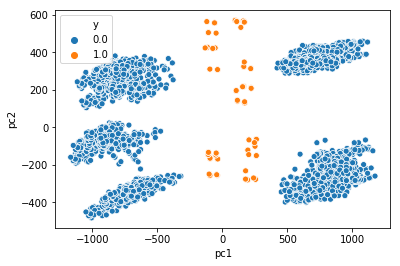

In [194]:
import seaborn as sns
sns.scatterplot(x="pc1", y="pc2", hue="y",data=DF)

In [195]:
from pyod.models.iforest import IForest
iforest=IForest(n_estimators=300, max_samples='auto', contamination=0.1, max_features=0.9, bootstrap=False, n_jobs=1, behaviour='old', random_state=None, verbose=0)
iforest.fit(X)

/Users/jimmy/Desktop/myenv/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=0.9,
    max_samples='auto', n_estimators=300, n_jobs=1, random_state=None,
    verbose=0)

In [196]:
y_pred=iforest.predict_proba(X)

In [197]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00000')

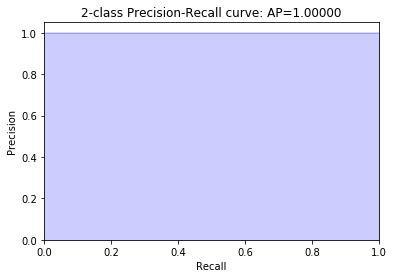

In [198]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y, y_pred[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

average_precision=np.mean(precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(
          average_precision))

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
x_train, x_test, y_train, y_test = train_test_split(DF.iloc[:,:2], DF.iloc[:,2], test_size=0.1, random_state=123)
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=123)

In [204]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(x_train, y_train)
predictions=[round(i) for i in clf.predict(x_test)]

precision_recall_fscore_support(y_test, predictions)

/Users/jimmy/Desktop/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([299,   8]))

In [205]:
import xgboost as xgb

In [206]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

/Users/jimmy/Desktop/myenv/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jimmy/Desktop/myenv/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [207]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [208]:
precision_recall_fscore_support(y_test, predictions)

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([299,   8]))

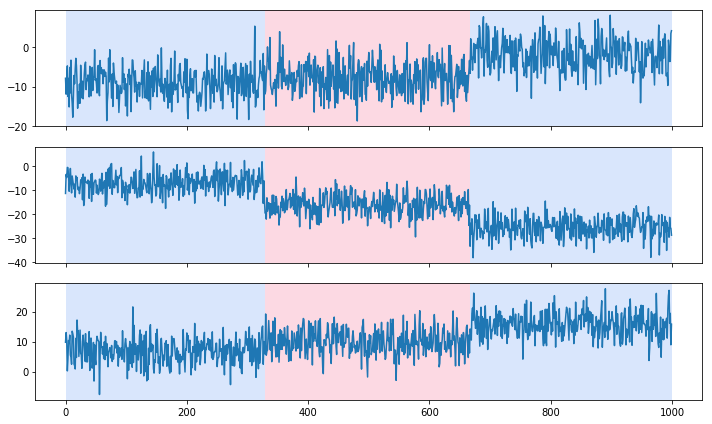

In [75]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 2  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=1000)

# display
rpt.display(signal, bkps, result)
plt.show()

In [76]:
result

[1000]

### 返回Change point位置

### 接著Change point區間內拉出關聯帳戶資料分析 -> 理專活動推出

In [4]:
a=pd.read_csv('/Users/jimmy/Downloads/AllNetworkData.csv',header=None)

ParserError: Error tokenizing data. C error: Expected 6 fields in line 840, saw 17


In [1]:
class Solution:
    def twoSum(self, nums: 'List[int]', target: 'int') -> 'List[int]':
        numMap = {}
        for i in range(len(nums)):
            if numMap.__contains__(target-nums[i]):
                return [numMap.get(target-nums[i]), i]
            else:
                numMap[nums[i]] = i

In [2]:
c=Solution()

In [6]:
c.twoSum([2.5,7,11,20],9)

In [8]:
{'5':0,'6':10}.__contains__('6')

True

In [9]:
{'5':0,'6':10}.get('6')

10